In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
telecom = pd.read_csv('Orange_Telecom_Churn_Data.csv')

In [3]:
telecom.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
telecom.shape

(4000, 21)

In [5]:
telecom.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object

In [6]:
telecom['churned'].unique()

array([False,  True])

In [7]:
import seaborn as sns

In [8]:
sns.set()

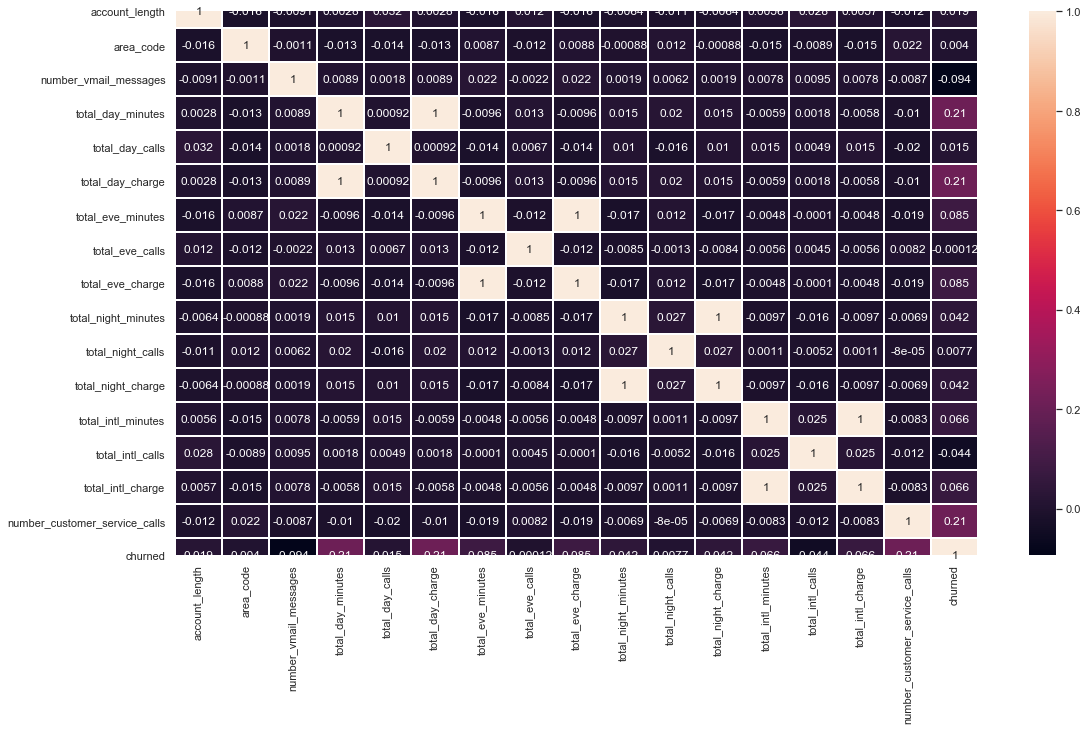

In [11]:
plt.figure(figsize=(18, 10))
sns.heatmap(telecom.corr(), annot=True, linewidth=1, linecolor='w')

In [12]:
training_data = telecom[['number_vmail_messages', 'total_night_calls', 'total_intl_minutes']]

In [13]:
training_data.isnull().sum()

number_vmail_messages    0
total_night_calls        0
total_intl_minutes       0
dtype: int64

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
output_data = telecom['churned']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X, x_test, Y, y_test = train_test_split(training_data, 
                                        output_data, 
                                        test_size=0.2, 
                                        random_state = 40)

In [18]:
model = KNeighborsClassifier(n_neighbors=2)

In [19]:
model.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [20]:
prediction = model.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
confusion = confusion_matrix(prediction, y_test)
confusion

array([[664, 117],
       [ 13,   6]], dtype=int64)

In [23]:
score = accuracy_score(prediction, y_test)
score

0.8375